# 2.1 - Evaluación Supervisado

### Regresión

In [9]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestRegressor as RFR     # el alias es mio

from sklearn.model_selection import train_test_split as tts

from sklearn.datasets import load_diabetes 

In [3]:
data = load_diabetes()

In [5]:
data['DESCR'].split('\n')

['.. _diabetes_dataset:',
 '',
 'Diabetes dataset',
 '----------------',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 '**Data Set Characteristics:**',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attribute Information:',
 '      - age     age in years',
 '      - sex',
 '      - bmi     body mass index',
 '      - bp      average blood pressure',
 '      - s1      tc, total serum cholesterol',
 '      - s2      ldl, low-density lipoproteins',
 '      - s3      hdl, high-density lipoproteins',
 '      - s4      tch, total cholesterol / HDL',
 '      - s5    

In [7]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])

df['target'] = data['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [10]:
X_train, X_test, y_train, y_test = tts(data['data'], # X
                                      data['target'], #y
                                       train_size=0.75
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 10), (111, 10), (331,), (111,))

In [11]:
# modelo


rfr = RFR()    # inicia el modelo


rfr.fit(X_train, y_train)   # entrena el modelo


y_pred = rfr.predict(X_test)   # prediccion con el tamaño del test

In [12]:
y_pred[:10]

array([227.69, 157.91,  92.25, 182.82,  94.21, 149.71,  83.43, 161.45,
       157.86, 177.36])

In [13]:
X_test.shape

(111, 10)

In [15]:
y_pred.shape, y_test.shape

((111,), (111,))

In [16]:
y_test.mean(), y_test.std()

(151.3963963963964, 75.26880110275754)

In [17]:
y_pred.mean(), y_pred.std()

(152.23837837837837, 57.604936311573454)

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [20]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

2662.9849711711704

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [21]:
mse(y_test, y_pred) ** 0.5

51.60411777340225

In [22]:
mse(y_test, y_pred, squared=False)

51.60411777340225

###### RMSLE


$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_i)-log(\hat{y}_i))^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [26]:
from sklearn.metrics import mean_squared_log_error as msle

msle(y_test, y_pred, squared=False)

0.4097605854878592

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [27]:
from sklearn.metrics import mean_absolute_error as mae


mae(y_test, y_pred)

43.38576576576578

$$MAE <= RMSE <= MAE · \sqrt{N}$$

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R2)\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [29]:
rfr.score(X_test, y_test) # R2, calcula internamente la prediccion, viene del modelo

0.529955778168081

In [30]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.529955778168081

In [31]:
def r2_ajustado(r_2):
    
    adj = 1 - (1 - r_2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)
    
    return adj

In [32]:
r2_ajustado(r2(y_test, y_pred))

0.48295135598488914

### Clasificación

In [33]:
data=pd.read_csv('../data/churn.csv')

data=data.dropna()

y=data.Churn.apply(lambda x: 1 if x=='Yes' else 0)

data=data.drop(columns=['customerID', 'ChurnBinary', 'Churn'])

data=pd.get_dummies(data)

X=data.copy()

X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthLevel_High,MonthLevel_Low,MonthLevel_Moderate,MonthLevel_Very High,MonthLevel_Very Low,TotalLevel_High,TotalLevel_Low,TotalLevel_Moderate,TotalLevel_Very High,TotalLevel_Very Low,TenureLevel_Loyal,TenureLevel_New,TenureLevel_Regular,TenureLevel_Very Loyal
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [34]:
X_train, X_test, y_train, y_test = tts(X, y, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5274, 59), (1758, 59), (5274,), (1758,))

In [35]:
# modelo 1 

# que no os confunda el nombre de regresion, es un clasificador esto
from sklearn.linear_model import LogisticRegression as LogReg


logreg = LogReg()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

y_prob = logreg.predict_proba(X_test)

In [37]:
y_pred_logreg[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
y_prob[:3]

array([[0.95103759, 0.04896241],
       [0.69141823, 0.30858177],
       [0.81227082, 0.18772918]])

In [39]:
# modelo 2

from sklearn.ensemble import RandomForestClassifier as RFC  


rfc = RFC()

rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

y_pred_rfc[:5]

array([0, 1, 0, 0, 0])

+ TP := True Positive (aciertos clase 1)
+ TN := True Negative (aciertos clase 0)
+ FP := False Positive (Error tipo I, decir 1 cuando es 0)
+ FN := False Negative (Error tipo II, decir 0 cuando es 1)

+ Accuracy  := (TP+TN)/(TP+TN+FP+FN) (acierto)  ($\frac{1}{n}\sum 1(\hat{y_i}=y_i$))
+ Precision := TP/(TP+FP)
+ Recall    := TP/(TP+FN)  (Sensibilidad, TPR)
+ F1_Score  := 2·Recall·Precision/(Recall+Precision)

(F1 funciona mejor que el accuracy cuando los datos no están balanceados y cuando FP y FN son muy diferentes)

![f1](images/f1.png)

##### Accuracy

In [40]:
logreg.score(X_test, y_test)    # accuracy, acierto

0.8128555176336746

In [42]:
y_test.value_counts() / y_test.shape[0] * 100

0    73.435722
1    26.564278
Name: Churn, dtype: float64

In [43]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred_logreg)

0.8128555176336746

In [44]:
rfc.score(X_test, y_test) 

0.7832764505119454

In [45]:
acc(y_test, y_pred_rfc)

0.7832764505119454

##### Precision

In [46]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred_logreg)

0.6751269035532995

In [47]:
prec(y_test, y_pred_rfc)

0.6137566137566137

##### Recall

In [48]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_logreg)

0.569593147751606

In [49]:
rec(y_test, y_pred_rfc)

0.49678800856531047

##### F1_Score

In [50]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_logreg)

0.6178861788617886

In [51]:
f1(y_test, y_pred_rfc)

0.5491124260355029

##### Matriz de Confusión

![conf_matrix](images/conf_matrix.jpeg)

In [52]:
from sklearn.metrics import confusion_matrix as cm


cm(y_test, y_pred_logreg)

array([[1163,  128],
       [ 201,  266]])

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
cm(y_test, y_pred_logreg)/cm(y_test, y_pred_logreg).sum()*100

array([[66.15472127,  7.28100114],
       [11.4334471 , 15.13083049]])

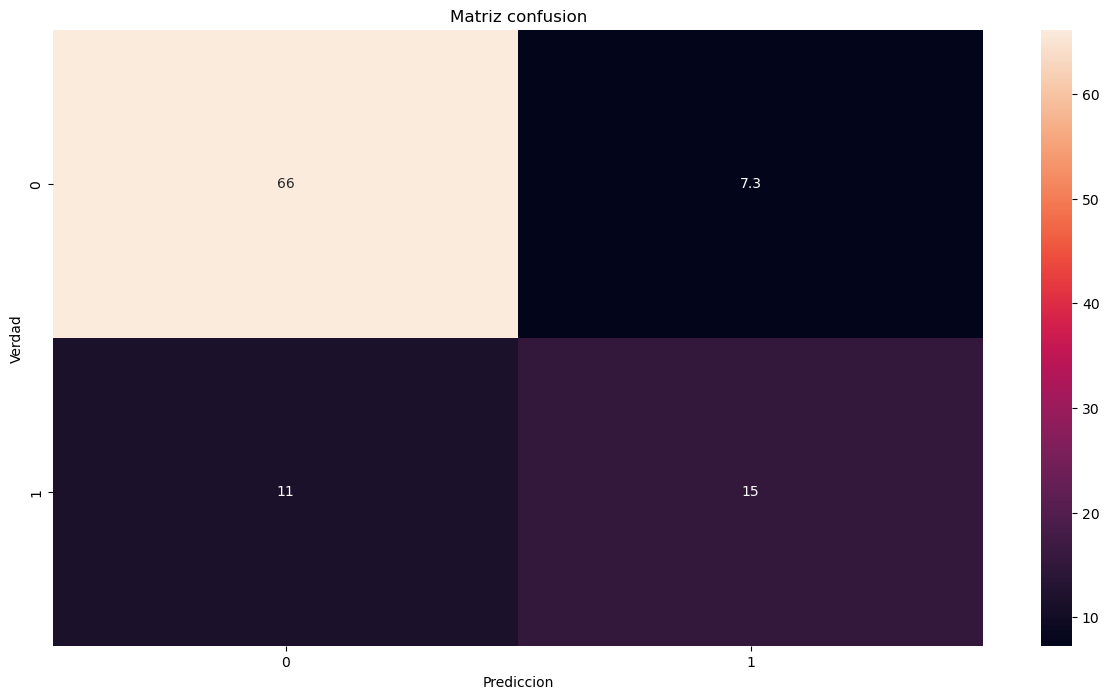

In [57]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_logreg)/cm(y_test, y_pred_logreg).sum() * 100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![roc](images/roc.png)

In [58]:
from sklearn.metrics import roc_curve as roc

from sklearn.metrics import roc_auc_score as auc

import warnings
warnings.filterwarnings('ignore')

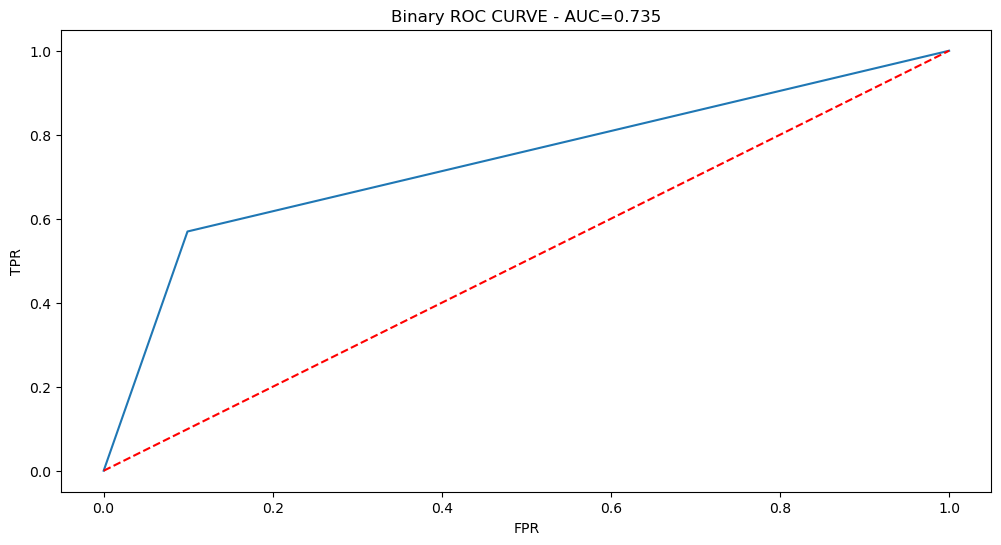

In [61]:
# esto esta mal pintao

plt.figure(figsize=(12, 6))

fpr, tpr, _ = roc(y_test, y_pred_logreg)  # por esto esta MAL

a = auc(y_test, y_pred_logreg)


plt.plot(fpr, tpr)

plt.plot(fpr, fpr, 'r--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('Binary ROC CURVE - AUC={:.3f}'.format(a))

plt.show();

In [63]:
y_prob[:4]

array([[0.95103759, 0.04896241],
       [0.69141823, 0.30858177],
       [0.81227082, 0.18772918],
       [0.98136951, 0.01863049]])

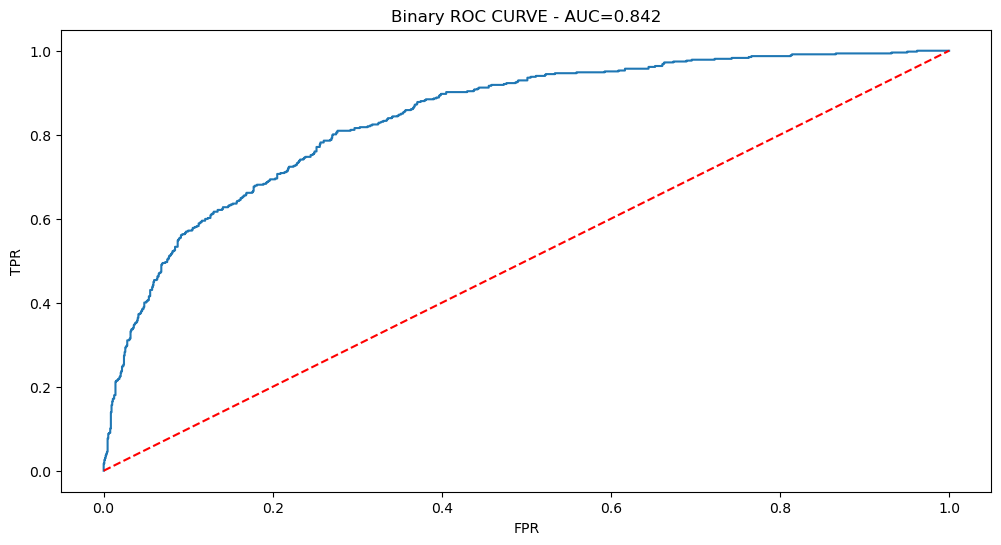

In [65]:
# esto esta BIEN pintao

plt.figure(figsize=(12, 6))

fpr, tpr, _ = roc(y_test, y_prob[::, 1])  # por esto esta MAL

a = auc(y_test, y_prob[::, 1])


plt.plot(fpr, tpr)

plt.plot(fpr, fpr, 'r--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('Binary ROC CURVE - AUC={:.3f}'.format(a))

plt.show();

**Probabilidad de que tu clasificador sea mejor que un clasificador random - Kappa de Cohen**

https://es.wikipedia.org/wiki/Coeficiente_kappa_de_Cohen

In [66]:
from sklearn.metrics import cohen_kappa_score as kappa

kappa(y_test, y_pred_logreg)

0.4951459530987866

In [67]:
kappa(y_test, y_pred_rfc)

0.40854495266049606

In [68]:
# Multiclase

In [69]:
from sklearn.datasets import load_wine

X=load_wine().data

y=load_wine().target

X_train, X_test, y_train, y_test = tts(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [73]:
load_wine()['DESCR'].split('\n')

['.. _wine_dataset:',
 '',
 'Wine recognition dataset',
 '------------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 178',
 '    :Number of Attributes: 13 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 ' \t\t- Alcohol',
 ' \t\t- Malic acid',
 ' \t\t- Ash',
 '\t\t- Alcalinity of ash  ',
 ' \t\t- Magnesium',
 '\t\t- Total phenols',
 ' \t\t- Flavanoids',
 ' \t\t- Nonflavanoid phenols',
 ' \t\t- Proanthocyanins',
 '\t\t- Color intensity',
 ' \t\t- Hue',
 ' \t\t- OD280/OD315 of diluted wines',
 ' \t\t- Proline',
 '',
 '    - class:',
 '            - class_0',
 '            - class_1',
 '            - class_2',
 '\t\t',
 '    :Summary Statistics:',
 '    ',
 '    ============================= ==== ===== ======= =====',
 '                                   Min   Max   Mean     SD',
 '    ============================= ==== ===== ======= =====',
 '    Alcohol:                      11.0  14.8    13.0   0.8',
 '    Malic Aci

In [74]:
rfc = RFC()

rfc.fit(X_train, y_train)

y_pred=rfc.predict(X_test)

y_prob_rfc = rfc.predict_proba(X_test)

In [76]:
from sklearn.svm import SVC

svc = SVC(probability=True)

svc.fit(X_train, y_train)

y_prob_svc = svc.predict_proba(X_test)

In [ ]:
%pip install scikit-plot

In [77]:
import scikitplot as skplt


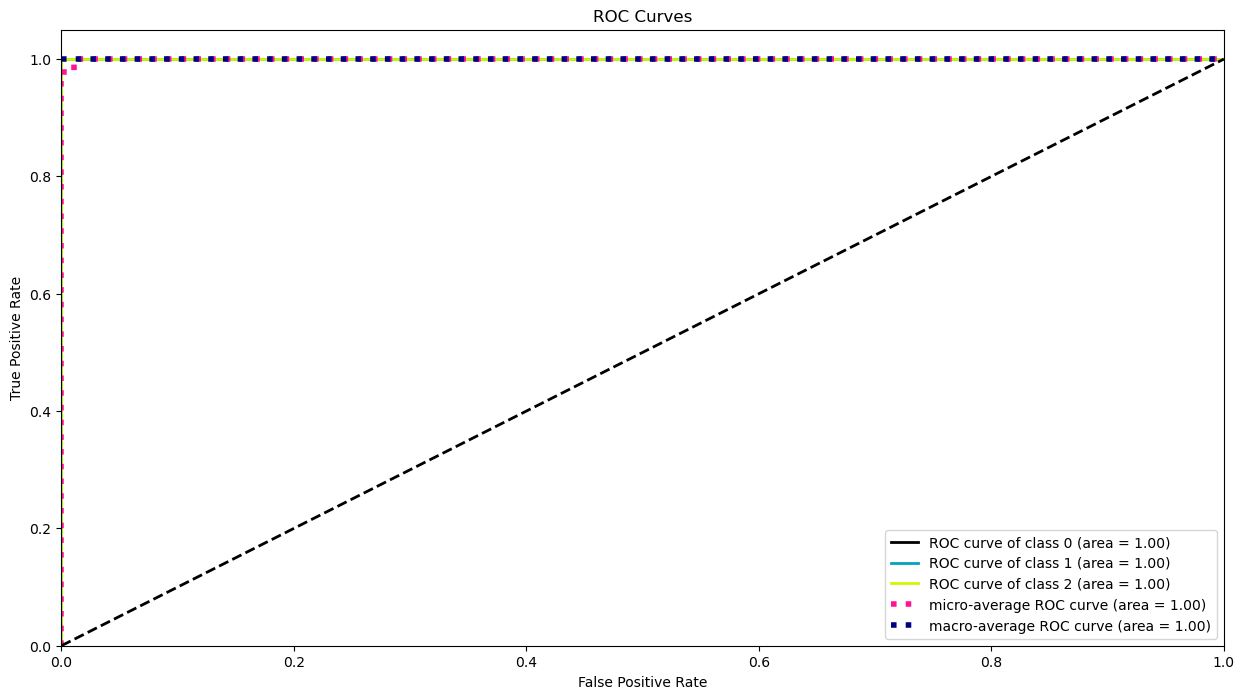

In [78]:
skplt.metrics.plot_roc(y_test, y_prob_rfc, figsize=(15, 8));

In [79]:
rfc.score(X_test, y_test)

0.9777777777777777

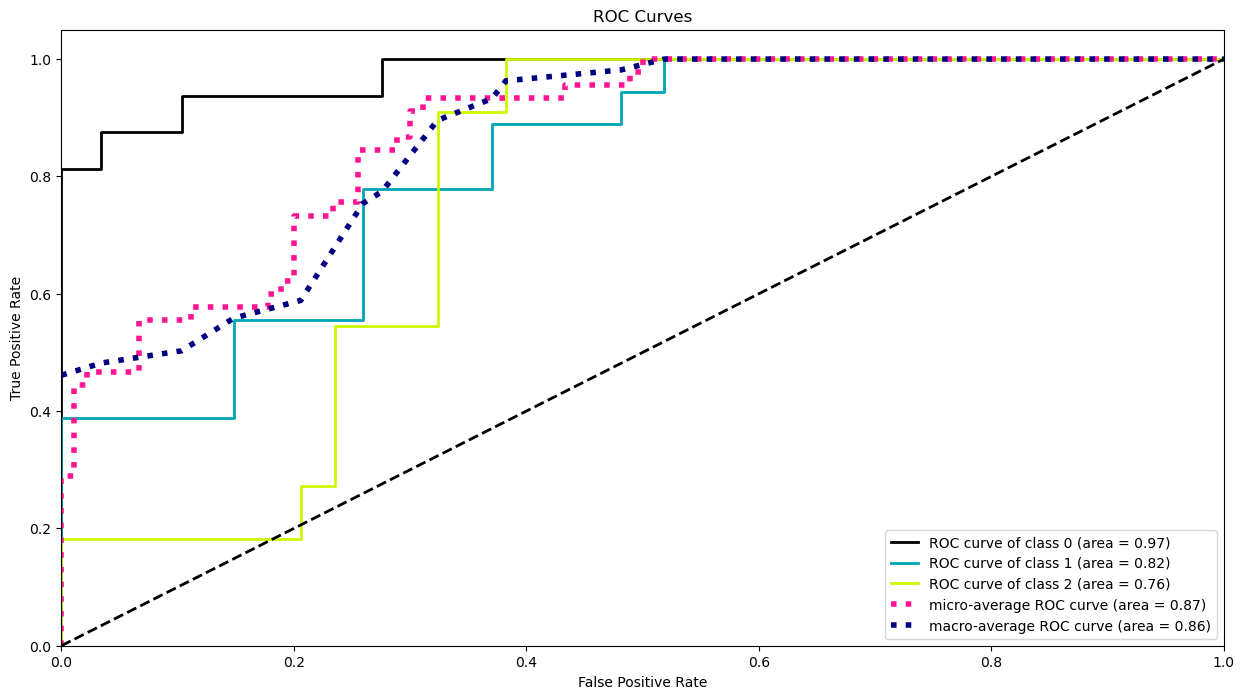

In [80]:
skplt.metrics.plot_roc(y_test, y_prob_svc, figsize=(15, 8));